# ENTREGA FINAL
**Salif Faustino - 20172005|Pedro Sousa - 2019101451**

# Breve Introdução

Na cadeira de Laboratório e ciências de dados, do 3º Ano da Licenciatura em Informática, foi-nos proposto a interpretação e implementação de algoritmos aprendidos durante o semestre, utilizando dados escolhidos por nós. Os dados escolhidos nesse trabalho correspondem aos registos acerca do vírus cov-19 no ano de 2020, entre os meses de março e junho. O objetivo desse trabalho é através dos algoritmos estudados recolher informação que possa ser útil e bem representada na perspetiva do cliente (pessoas que não percebem nada sobre algoritmos). Com base nesse objetivo iremos explorar e interpretar todos os resultados obtidos.



## Descrição dos atributos da tabela de dados
|Atributo |Descrição |
|---|---|
|ID  |número identificador do caso |
|CONTADOR |número de pessoa testada no Brasil |
|DATA_NOTIFICACAO |data de notificação do resultado do teste |
|CLASSIFICACAO_CASO|se o teste é confirmado ser positivo ou não|
|SEXO |género da pessoa (masculino ou feminino) |
|IDADE |idade da pessoa que realizou o teste |
|FAIXA_ETARIA |faixa etária da pessoa testada|
|MUNICIPIO_RESIDENCIA_COD |município de residência da pessoa |
|MUNICIPIO_RESIDENCIA |município de residência da pessoa |
|COMORBIDADE|se a pessoa tem comorbidade prognóstica |
|EVOLUCAO |evolução do estado da pessoa no momento da data de obtenção dos dados |
|INTERNACAO |se a pessoa esteve internada ou não |
|UTI |se a pessoa esteve numa unidade de tratamento intensivo |
|DATA_ATUALIZACAO |data de obtenção dos dados anteriores (único valor, 25/06/2020) |





## Escalas de medida

|Atributo                       | Escala de medida    |
|-------------------------------|---------------------|
|ID                             |ordinal              |
|CONTADOR                       |ordinal              |
|DATA_NOTIFICACAO               |ordinal              |
|CLASSIFICACAO_CASO             |nominal              |
|SEXO                           |nominal              |
|IDADE                          |razão ou rácio       |
|FAIXA_ETARIA                   |intervalar           | 
|MUNICIPIO_RESIDENCIA_COD       |nominal              |
|MUNICIPIO_RESIDENCIA           |nominal              |
|COMORBIDADE                    |nominal              |
|EVOLUCAO                       |nominal              |
|INTERNACAO                     |nominal              |
|UTI                            |nominal              |
|DATA_ATUALIZACAO               |ordinal              |


## Exploração, Pré-processamento e Validação

In [18]:
#importar as bibliotecas necessárias para fazer a exploração, pré-processamento e validação dos dados.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [19]:
dados = pd.read_csv('notificacoes-covid19-mg.csv',encoding = "ISO-8859-1", delimiter=";", decimal=",", nrows=500, header=0,index_col=0)
dados

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
1,1,296297,04/03/2020,Caso Confirmado,Feminino,38,30 a 39 anos,313130.0,IPATINGA,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
2,2,296298,07/03/2020,Caso Confirmado,Feminino,47,40 a 49 anos,312230.0,DIVINÓPOLIS,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
3,3,296299,14/03/2020,Caso Confirmado,Masculino,65,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,SIM,25/06/2020
4,4,296300,14/03/2020,Caso Confirmado,Feminino,37,30 a 39 anos,314810.0,PATROCÍNIO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
5,5,296301,16/03/2020,Caso Confirmado,Masculino,45,40 a 49 anos,310620.0,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,503,296792,05/04/2020,Caso Confirmado,Feminino,64,60 a 69 anos,310620.0,BELO HORIZONTE,SIM,RECUPERADO,SIM,NÃO,25/06/2020
497,504,296793,13/04/2020,Caso Confirmado,Masculino,78,70 a 79 anos,315150.0,PIUMHI,SIM,OBITO,SIM,SIM,25/06/2020
498,505,296794,05/04/2020,Caso Confirmado,Feminino,67,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,NÃO,25/06/2020
499,506,296795,05/04/2020,Caso Confirmado,Masculino,36,30 a 39 anos,314800.0,PATOS DE MINAS,NÃO,RECUPERADO,SIM,NÃO,25/06/2020


# Descrição dos dados de todos dados

In [20]:
dados.describe(include='all')

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500.000000,500.000000,500,500,500,500.000000,500,493.00000,500,500,500,500,500,500
unique,NaN,NaN,33,1,2,NaN,10,NaN,58,3,3,3,3,1
top,NaN,NaN,04/04/2020,Caso Confirmado,Masculino,NaN,30 a 39 anos,NaN,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,NaN,NaN,65,500,291,NaN,139,NaN,253,338,479,299,365,500
mean,252.130000,296546.500000,NaN,NaN,NaN,45.936000,NaN,312459.64503,NaN,NaN,NaN,NaN,NaN,NaN
std,146.508945,144.481833,NaN,NaN,NaN,16.634582,NaN,2327.08741,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,296297.000000,NaN,NaN,NaN,0.000000,NaN,310160.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,125.750000,296421.750000,NaN,NaN,NaN,34.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,250.500000,296546.500000,NaN,NaN,NaN,42.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,380.250000,296671.250000,NaN,NaN,NaN,58.000000,NaN,314480.00000,NaN,NaN,NaN,NaN,NaN,NaN


## Descrição de dados númericos

In [21]:
# Descrição de dados númericos 
dados.describe()

,ID,CONTADOR,IDADE,MUNICIPIO_RESIDENCIA_COD
count,500.000000,500.000000,500.000000,493.00000
mean,252.130000,296546.500000,45.936000,312459.64503
std,146.508945,144.481833,16.634582,2327.08741
min,1.000000,296297.000000,0.000000,310160.00000
25%,125.750000,296421.750000,34.000000,310620.00000
50%,250.500000,296546.500000,42.000000,310620.00000
75%,380.250000,296671.250000,58.000000,314480.00000
max,507.000000,296796.000000,94.000000,317100.00000


## Descrição de dados categóricos, datetime,object(não-númericos)

In [22]:
dados.describe(include=["category","datetime","object"])

,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500,500,500,500,500,500,500,500,500,500
unique,33,1,2,10,58,3,3,3,3,1
top,04/04/2020,Caso Confirmado,Masculino,30 a 39 anos,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,65,500,291,139,253,338,479,299,365,500


In [23]:
# números de individuos infetados do sexo masculino e feminino
dados_sexo = dados["SEXO"].value_counts()

# números de individuos infetados em todas as faixas etárias 
dados_faixa_etaria=dados["FAIXA_ETARIA"].value_counts()

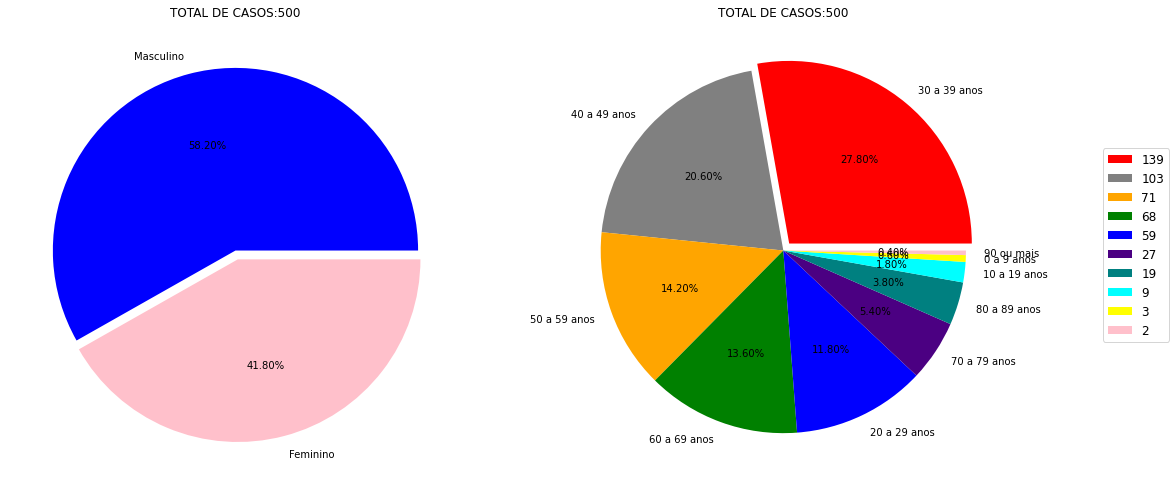

In [24]:
casosporsexo=dados.SEXO.value_counts()
casosporfaixaetaria=dados.FAIXA_ETARIA.value_counts()
explode = (0.1, 0)
fig, axs = plt.subplots(1, 2, figsize=(18,10))

casosporsexo.plot.pie(label="room_type", autopct="%.2f%%", ax=axs[0],explode = (0, 0.05), title="TOTAL DE CASOS:"+ str(dados.iloc[-1].name),colors = ['blue', 'pink'] ,)
axs[0].set(ylabel="")

casosporfaixaetaria.plot.pie(label="room_type", autopct="%.2f%%", ax=axs[1],explode = (0.05, 0, 0, 0,0,0,0,0,0,0), title="TOTAL DE CASOS:" + str(dados.iloc[-1].name),colors = ['red', 'grey', 'orange', 'green', 'blue', 'indigo', 'teal', 'aqua', 'yellow', 'pink'])
axs[1].set(ylabel="")
plt.legend(dados_faixa_etaria, loc=(1.2, 0.3),fontsize=12)


<p> No primeiro Gráfico indicamos as percentagens das pessoas infetadas com o coronavírus, onde podemos observar que os indivíduos do sexo masculino apresentam maior percentagem de infeção em relação aos indivíduos do sexo feminino.</p>
<p>No segundo gráfico indicamos as percentagens de pessoas infetadas por grupo etário, onde podemos observar que o grupo compreendido entre as idades dos 30 aos 39 apresenta maior percentagem de infeção</p>

In [25]:
# lista com as datas de notificação
lista_datas = dados["DATA_NOTIFICACAO"].tolist()
#lista_datas

In [26]:
#lista com as datas ordenadas
dates = [datetime.datetime.strptime(ts, "%d/%m/%Y") for ts in lista_datas]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%d/%m/%Y") for ts in dates]
#sorteddates

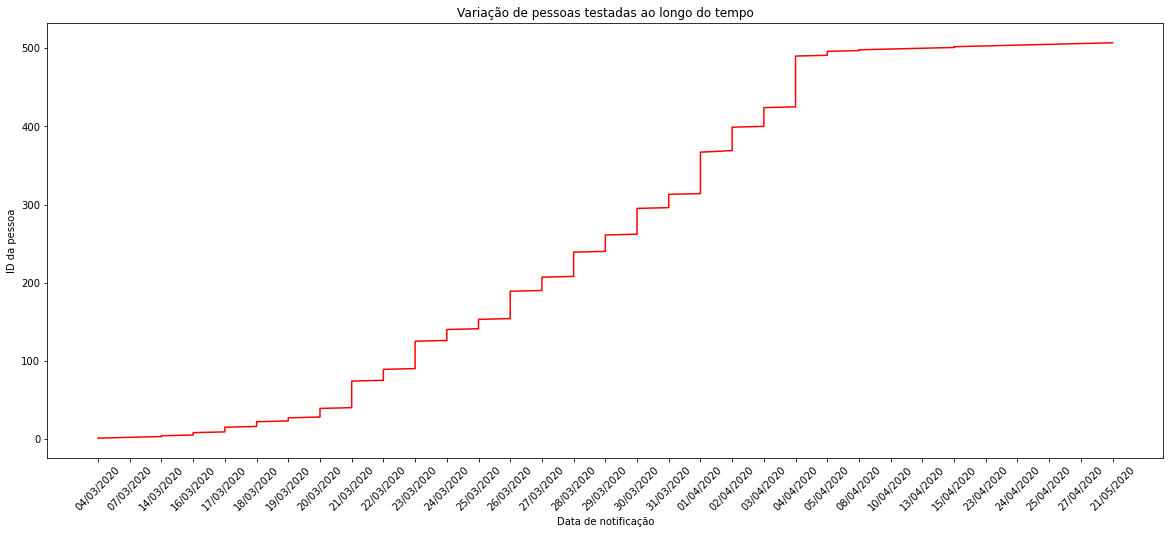

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set(xlabel = "Data de notificação", ylabel = "ID da pessoa", title = "Variação de pessoas testadas ao longo do tempo")
plt.setp(ax.get_xticklabels(), rotation=45)
ax.plot(sorteddates, dados["ID"], color = "red")

<p>Este gráfico mostra  o número de pessoas testadas ao logo do tempo, onde podemos observar que o crescimento é exponencial,ou seja, a medida que o tempo passa mais testes são realizados devido ao aumento de pessoas infectadas.</p>

In [28]:
# números de individuos infetados do sexo masculino e feminino por faixa etária 
dados_faixa = dados["FAIXA_ETARIA"].value_counts().sort_index()
#dados_faixa

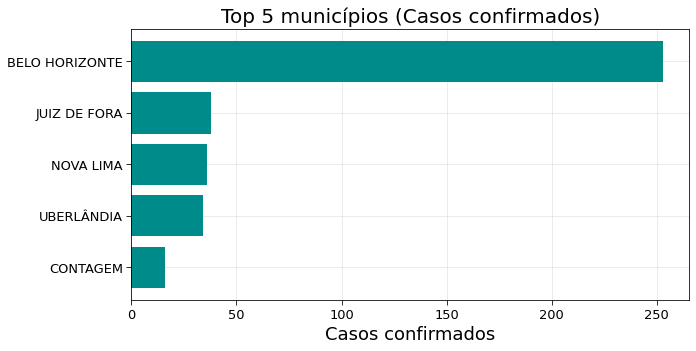

In [29]:
#Número de casos por faixa etária
# No eixo y temos a faixa etária e no eixo x temos o número de casos
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
ax = plt.barh(dados["MUNICIPIO_RESIDENCIA"].value_counts(sort = True,ascending=True ).index[-5:],dados["MUNICIPIO_RESIDENCIA"].value_counts(sort = True,ascending=True ).values[-5:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Casos confirmados",fontsize=18)
plt.title("Top 5 municípios (Casos confirmados)",fontsize=20)
plt.grid(alpha=0.3)


<p>Este gráfico mostra o top 5  das regiões com maior número de casos, onde o município de  BELO HORIZONTE apresenta maior número de casos.</p>

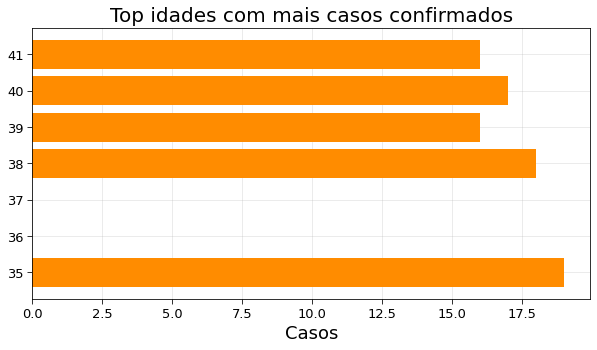

In [38]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(dados["IDADE"].value_counts(sort = True,ascending=True ).index[-5:],dados["IDADE"].value_counts(sort = True,ascending=True ).values[-5:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Casos",fontsize=18)
plt.title("Top idades com mais casos confirmados",fontsize=20)
plt.grid(alpha=0.3)

<p> Idades mais prominientes do vírus. Como se pode notar, não existiram casos nas idades de 36 e 37 anos <p>

In [39]:
dados['DATA_NOTIFICACAO']=pd.to_datetime(dados['DATA_NOTIFICACAO'],format='%d/%m/%Y')
dados.index=dados['DATA_NOTIFICACAO']


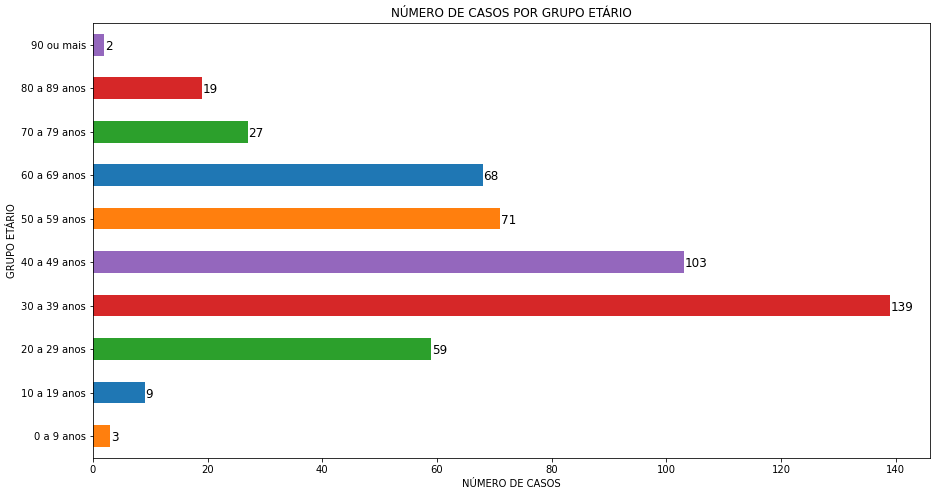

In [40]:
#Número de casos por faixa etária
# No eixo y temos a faixa etária e no eixo x temos o número de casos

df = dados["FAIXA_ETARIA"].value_counts().sort_index()
ax=df.plot.barh(color=['C1', 'C0', 'C2', 'C3', 'C4'],figsize=(15,8))
ax.set(xlabel = "NÚMERO DE CASOS", ylabel = "GRUPO ETÁRIO", title = "NÚMERO DE CASOS POR GRUPO ETÁRIO")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.14, \
            str(round((i.get_width()), 4)), fontsize=12, color="black")

<p> Este gráfico mostra o número de casos registados por faixa etária,  podemos observar que o grupo com as idades compreendidas  entre os 30 e os 39
apresentam um maior número de casos em relação às demais faixas etárias  e o grupo com as idades compreendidas entre os 0 e 9 apresenta um menor número de casos. </p>

<BarContainer object of 3 artists>

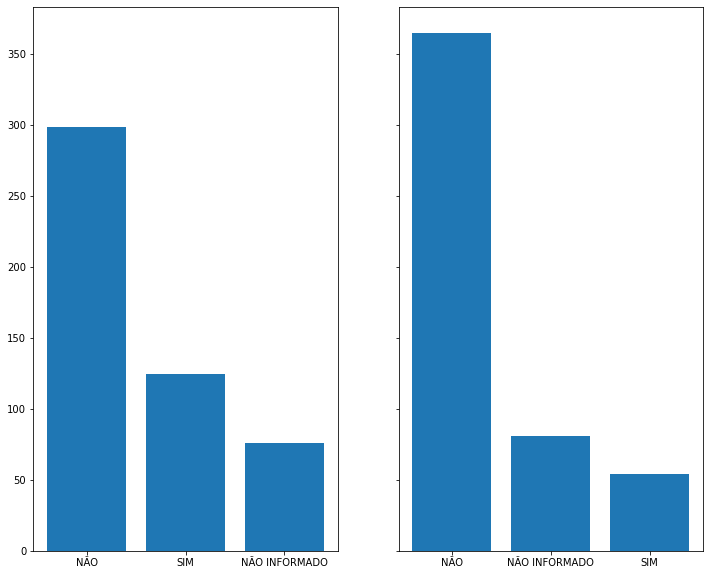

In [41]:
#bar plot para comparar internamentos com cuidados intensivos
fig, axs = plt.subplots(1,2,figsize=(12, 10), sharey=True)
G=dados["INTERNACAO"].value_counts()
G1=dados["UTI"].value_counts()
axs[0].bar(G.keys(),G )
axs[1].bar(G1.keys(),G1 )

<p> Os gráficos comparam a quantidade de pessoas das quais se sabe ou não (ou não foi informado) que estiveram internadas com as que estiveram nos cuidados intensivos </p>

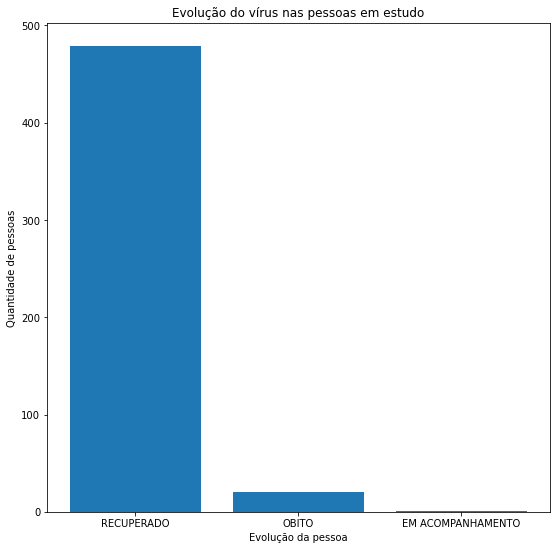

In [42]:
fig, axs = plt.subplots(figsize=(9, 9), sharey=True)
E=dados["EVOLUCAO"].value_counts()
axs.bar(E.keys(),E )
axs.set_xlabel("Evolução da pessoa") 
axs.set_ylabel("Quantidade de pessoas") 
axs.set_title("Evolução do vírus nas pessoas em estudo")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.14, \
            str(round((i.get_width()), 4)), fontsize=12, color="red")

<p>Este gráfico ilustra a evolução dos virus, onde podemos observar que temos um número de recuperados bastante considerável quando comparado com os óbitos e casos em acompanhamento.</p>